Import necessary libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import stroke data and understand the data.

In [113]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.info()
df.describe()
df.head()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Look for null values in each column. bmi had 201 null values so I replaced the null values with the mean of the non null bmi values.

In [70]:
df.isnull().sum()
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

Look at proportion of stroke to non stroke cases.

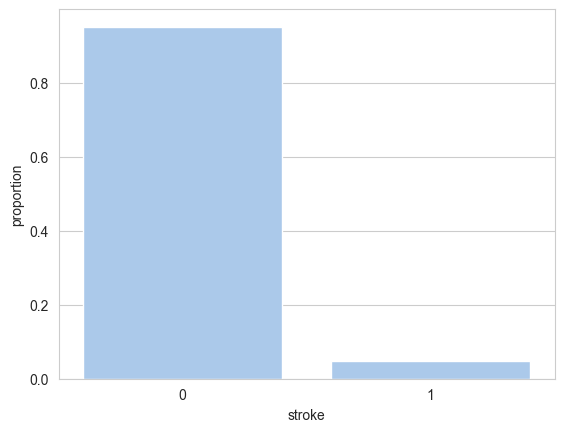

In [109]:
sns.barplot(df['stroke'].value_counts(normalize=True))
sns.set_palette("pastel") 


Look for potential risk factors.
Turned stroke and hypertension into booleans for simpler comprehension of the data.

First we look at the proportion of hypertenstion within the two classes of stroke which is either true or false.

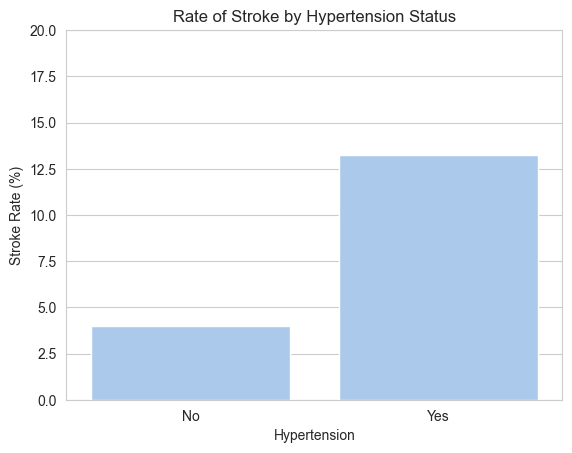

0     3.967910
1    13.253012
Name: stroke, dtype: float64


In [121]:

prop_df = (
    df.groupby('hypertension')['stroke']
    .mean()
    .reset_index()
)

prop_df['stroke'] *= 100

# Plot
sns.barplot(x='hypertension', y='stroke', data=prop_df)
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Rate of Stroke by Hypertension Status')
plt.ylabel('Stroke Rate (%)')
plt.xlabel('Hypertension')
plt.ylim(0, 20)
plt.show()
print(prop_df['stroke'])

Next let's look at gender

0    4.709419
1    5.106383
2    0.000000
Name: stroke, dtype: float64


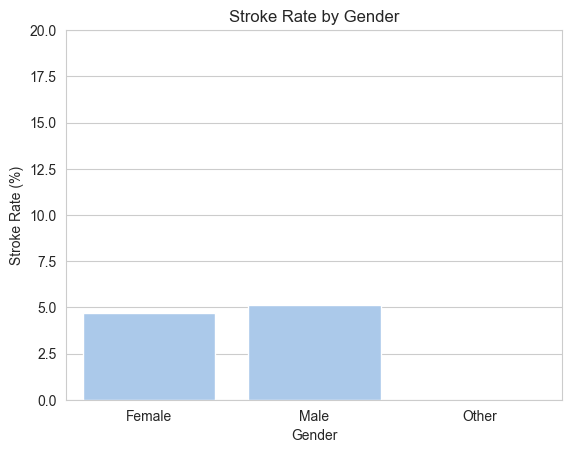

In [122]:
gender_stroke = df.groupby('gender')['stroke'].mean().reset_index()
gender_stroke['stroke'] *= 100

sns.barplot(x='gender', y='stroke', data=gender_stroke)
plt.title('Stroke Rate by Gender')
plt.ylabel('Stroke Rate (%)')
plt.ylim(0, 20)
plt.xlabel('Gender')
print(gender_stroke['stroke'])

age factor

/var/folders/ps/s7jvswt916z7d_pxxg_vplwm0000gn/T/ipykernel_71046/40161202.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stroke = df.groupby('age_group')['stroke'].mean().reset_index()


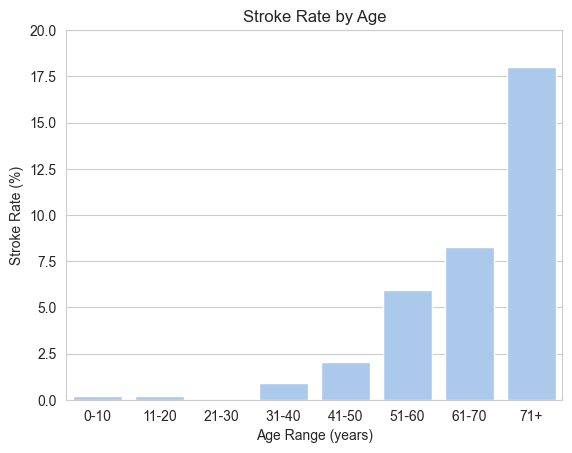

0     0.197239
1     0.193050
2     0.000000
3     0.890208
4     2.029770
5     5.953827
6     8.249158
7    18.028169
Name: stroke, dtype: float64


In [135]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 110]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']
sns.set_palette("pastel") 
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)
age_stroke = df.groupby('age_group')['stroke'].mean().reset_index()
age_stroke['stroke'] *= 100
sns.barplot(x='age_group', y='stroke', data=age_stroke)
plt.title('Stroke Rate by Age')
plt.ylabel('Stroke Rate (%)')
plt.ylim(0, 20)
plt.xlabel('Age Range (years)')
plt.show()
print(age_stroke['stroke'])

heart disease factor

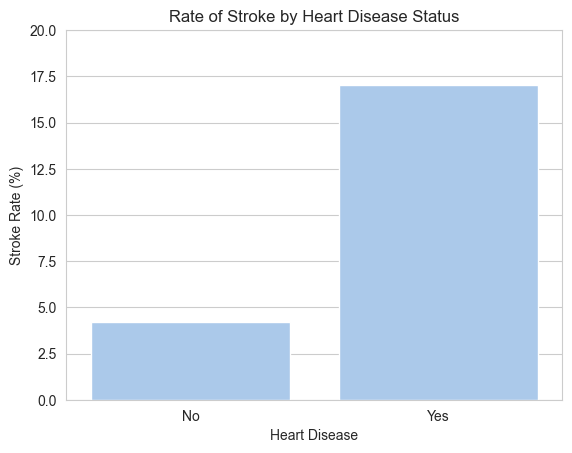

0     4.178734
1    17.028986
Name: stroke, dtype: float64


In [124]:
hd_stroke = (
    df.groupby('heart_disease')['stroke']
    .mean()
    .reset_index()
)

hd_stroke['stroke'] *= 100

# Plot
sns.barplot(x='heart_disease', y='stroke', data=hd_stroke)
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Rate of Stroke by Heart Disease Status')
plt.ylabel('Stroke Rate (%)')
plt.xlabel('Heart Disease')
plt.ylim(0, 20)
plt.show()
print(hd_stroke['stroke'])


Marriage history factor

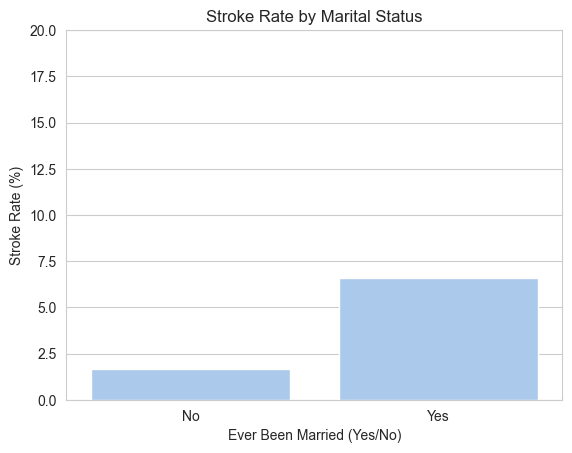

0    1.650541
1    6.561288
Name: stroke, dtype: float64


In [125]:
marriage_stroke = (
    df.groupby('ever_married')['stroke']
    .mean()
    .reset_index()
)

marriage_stroke['stroke'] *= 100

# Plot
sns.barplot(x='ever_married', y='stroke', data=marriage_stroke)
plt.title('Stroke Rate by Marital Status')
plt.ylabel('Stroke Rate (%)')
plt.xlabel('Ever Been Married (Yes/No)')
plt.ylim(0, 20)
plt.show()
print(marriage_stroke['stroke'])

Work type factor

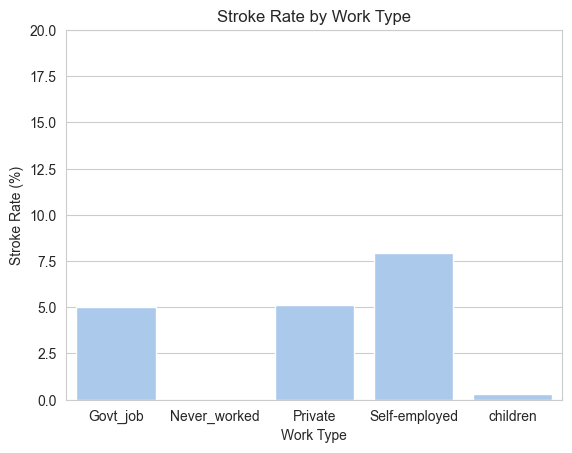

0    5.022831
1    0.000000
2    5.094017
3    7.936508
4    0.291121
Name: stroke, dtype: float64


In [126]:
work_type_stroke = (
    df.groupby('work_type')['stroke']
    .mean()
    .reset_index()
)

work_type_stroke['stroke'] *= 100

# Plot
sns.barplot(x='work_type', y='stroke', data=work_type_stroke)
plt.title('Stroke Rate by Work Type')
plt.ylabel('Stroke Rate (%)')
plt.xlabel('Work Type')
plt.ylim(0, 20)
plt.show()
print(work_type_stroke['stroke'])

Residence type

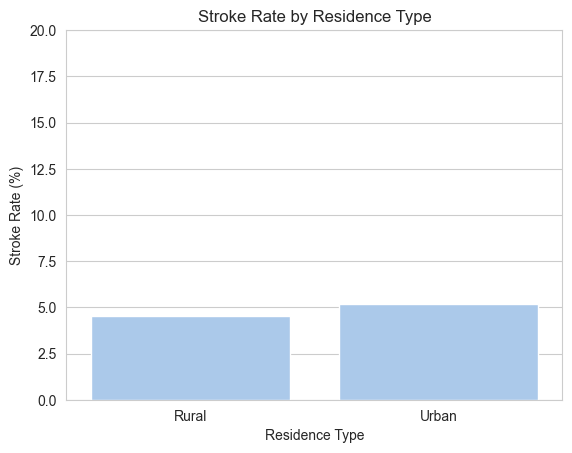

0    4.534606
1    5.200308
Name: stroke, dtype: float64


In [128]:
Residence_type_stroke = (
    df.groupby('Residence_type')['stroke']
    .mean()
    .reset_index()
)

Residence_type_stroke['stroke'] *= 100

# Plot
sns.barplot(x='Residence_type', y='stroke', data=Residence_type_stroke)
plt.title('Stroke Rate by Residence Type')
plt.ylabel('Stroke Rate (%)')
plt.xlabel('Residence Type')
plt.ylim(0, 20)
plt.show()
print(Residence_type_stroke['stroke'])

Average glucose level ranges based on WHO/ADA standards

/var/folders/ps/s7jvswt916z7d_pxxg_vplwm0000gn/T/ipykernel_71046/3983240699.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  glucose_stroke = df.groupby('avg_glucose_level_group')['stroke'].mean().reset_index()


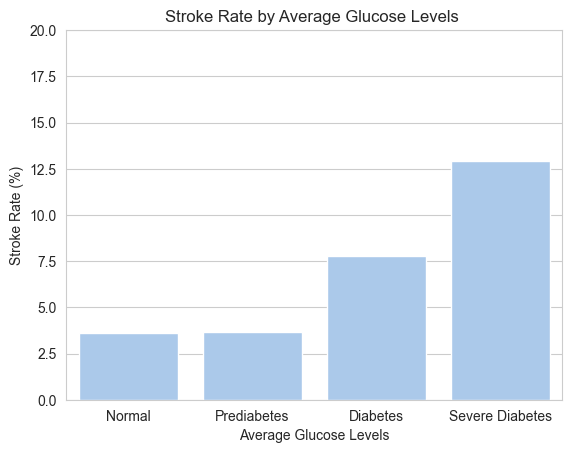

0     3.614458
1     3.657363
2     7.773852
3    12.903226
Name: stroke, dtype: float64


In [129]:
bins_glucose = [0, 99, 125, 200, 400]
labels_glucose = ['Normal', 'Prediabetes', 'Diabetes', 'Severe Diabetes']

df['avg_glucose_level_group'] = pd.cut(df['avg_glucose_level'], bins=bins_glucose, labels=labels_glucose, right=True)
glucose_stroke = df.groupby('avg_glucose_level_group')['stroke'].mean().reset_index()
glucose_stroke['stroke'] *= 100
sns.barplot(x='avg_glucose_level_group', y='stroke', data=glucose_stroke)
plt.title('Stroke Rate by Average Glucose Levels ')
plt.ylabel('Stroke Rate (%)')
plt.ylim(0, 20)
plt.xlabel('Average Glucose Levels')
plt.show()
print(glucose_stroke['stroke'])

Bmi ranges  based on WHO or CDC standards

/var/folders/ps/s7jvswt916z7d_pxxg_vplwm0000gn/T/ipykernel_71046/2285826534.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_stroke = df.groupby('bmi_group')['stroke'].mean().reset_index()


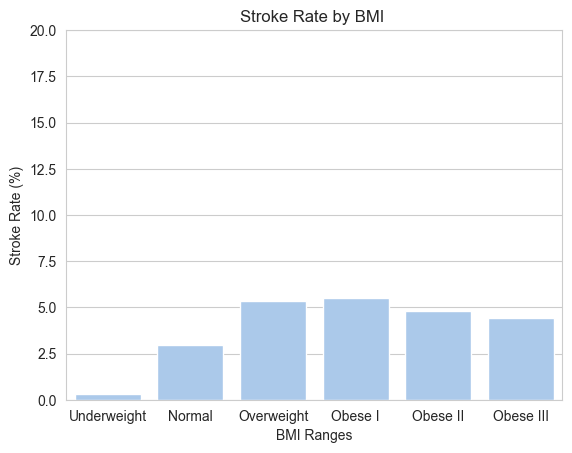

0    0.286533
1    2.941176
2    5.322924
3    5.482234
4    4.800000
5    4.411765
Name: stroke, dtype: float64


In [130]:
bins_bmi = [0, 18.5, 25, 30, 35, 40, 100]
labels_bmi = [
    'Underweight',   # 0 < BMI ≤ 18.5
    'Normal',        # 18.5 < BMI ≤ 25
    'Overweight',    # 25 < BMI ≤ 30
    'Obese I',       # 30 < BMI ≤ 35
    'Obese II',       # 35 < BMI ≤ 40
    'Obese III'      # 40 ≤  BMI
]

df['bmi_group'] = pd.cut(df['bmi'], bins=bins_bmi, labels=labels_bmi, right=True)
bmi_stroke = df.groupby('bmi_group')['stroke'].mean().reset_index()
bmi_stroke['stroke'] *= 100
sns.barplot(x='bmi_group', y='stroke', data=bmi_stroke)
plt.title('Stroke Rate by BMI ')
plt.ylabel('Stroke Rate (%)')
plt.ylim(0, 20)
plt.xlabel('BMI Ranges')
plt.show()
print(bmi_stroke['stroke'])

Smoking Status

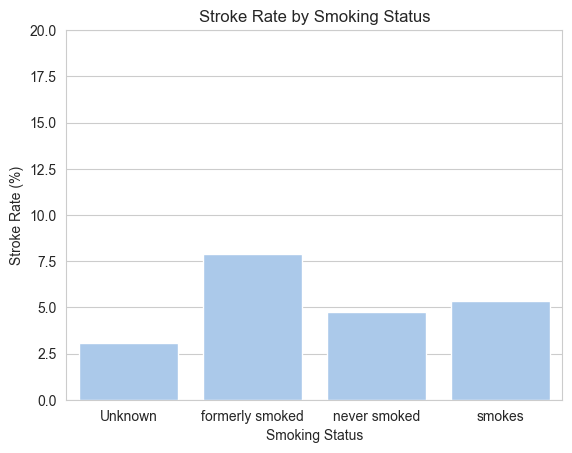

0    3.044041
1    7.909605
2    4.756871
3    5.323194
Name: stroke, dtype: float64


In [131]:
smoking_status_stroke = (
    df.groupby('smoking_status')['stroke']
    .mean()
    .reset_index()
)

smoking_status_stroke['stroke'] *= 100

# Plot
sns.barplot(x='smoking_status', y='stroke', data=smoking_status_stroke)
plt.title('Stroke Rate by Smoking Status')
plt.ylabel('Stroke Rate (%)')
plt.xlabel('Smoking Status')
plt.ylim(0, 20)
plt.show()
print(smoking_status_stroke['stroke'] )

Correlation coefficient for whole dataframe